In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import copy


/tmp/ipykernel_1611444/4081242878.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/tmp/ipykernel_1611444/4081242878.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/lustre07/scratch/mina94/fixSeed_threads/myenv2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/lustre07/scratch/mina94/fixSeed_threads/myenv2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


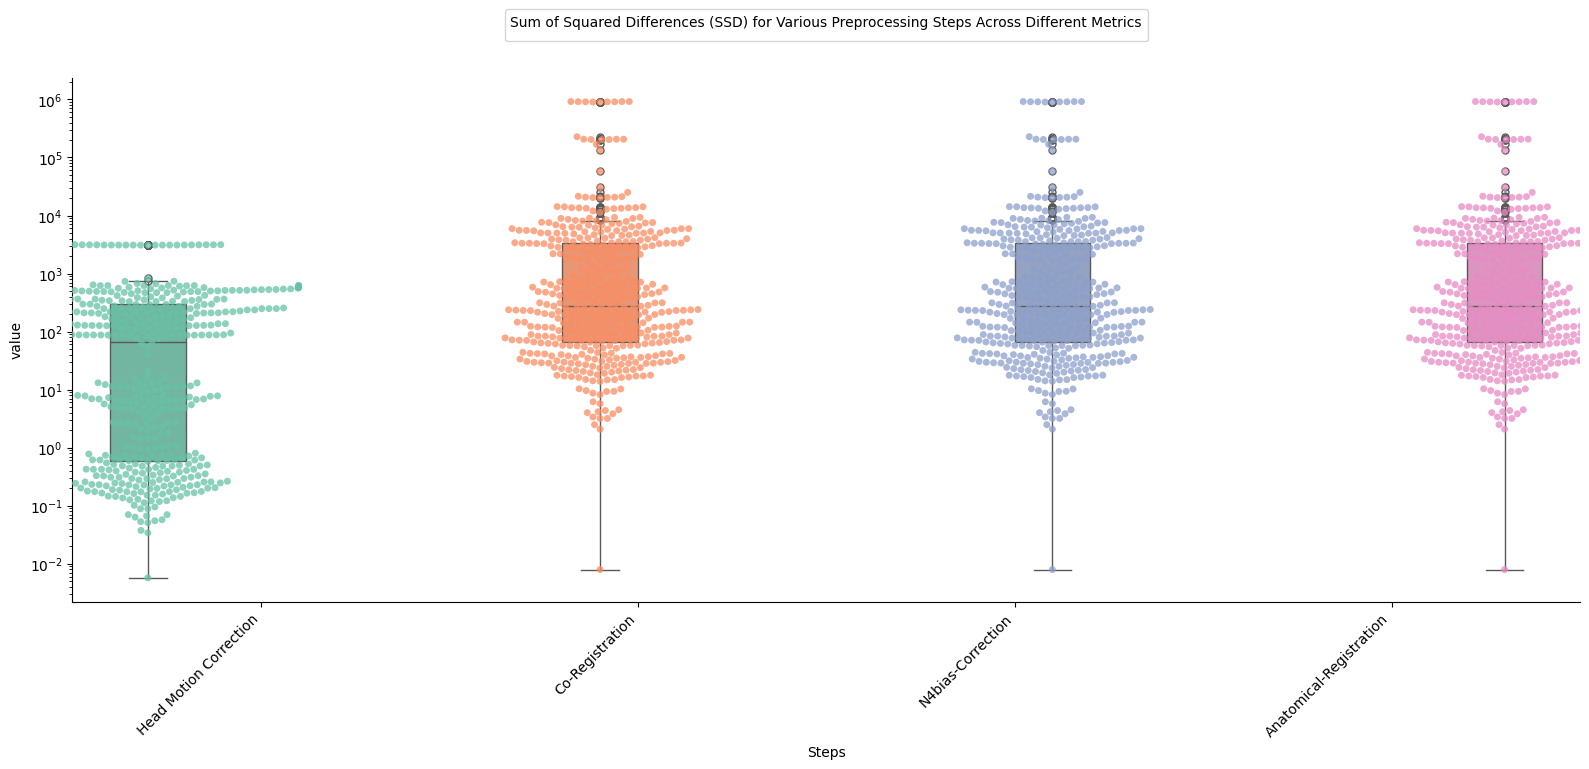

In [8]:


# Load your CSV data
fslstats_hmc_values = pd.read_csv('/home/mina94/scratch/fixSeed_threads/eval_SSD_hmc/fslstats_hmc_values.csv')
fslstats_CoReg_values = pd.read_csv('/home/mina94/projects/rrg-glatard/mina94/fixSeed_threads/eval_SSD_CoReg/fslstats_values.csv')
fslstats_N4bias_values = pd.read_csv('/home/mina94/scratch/fixSeed_threads/eval_SSD_N4bias/fslstats_N4bias_values.csv')
fslstats_AnatReg_values = pd.read_csv('/home/mina94/projects/rrg-glatard/mina94/fixSeed_threads/eval_SSD_AnatReg/fslstats_values.csv')
# Create a new DataFrame combining the relevant columns
fslstats = pd.DataFrame()
fslstats['Head Motion Correction'] = fslstats_hmc_values['Sum_of_squared_differences']
fslstats['Co-Registration'] = fslstats_N4bias_values['Sum_of_squared_differences']
fslstats['N4bias-Correction'] = fslstats_N4bias_values['Sum_of_squared_differences']
fslstats['Anatomical-Registration'] = fslstats_N4bias_values['Sum_of_squared_differences']

# Melt the DataFrame to long-form for seaborn plotting
fslstats_melted = fslstats.melt(var_name='Steps', value_name='value')

# Create the boxplot and swarmplot using seaborn.catplot
g = sns.catplot(
    data=fslstats_melted, kind="box", x='Steps', y='value',
    palette="Set2", height=8, aspect=2, dodge=True  # Adjust the height and aspect ratio
)

# Overlay the swarmplot on the boxplot
sns.swarmplot(
    data=fslstats_melted, x='Steps', y='value',
    palette="Set2", dodge=True, alpha=0.75, ax=g.ax
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust the legend position
# Modify the legend to be above the plot
g.ax.legend(title='Sum of Squared Differences (SSD) for Various Preprocessing Steps Across Different Metrics', 
            bbox_to_anchor=(0.5, 1.1), loc='center', ncol=2)
g.set(yscale="log")

# Use tight_layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Define the file path to your JSON file
file_path = '/home/mina94/projects/rrg-glatard/mina94/fixSeed_threads/Notebook/dict_4statistic_IEEE.json'

# Open the JSON file and load its contents into a dictionary
with open(file_path, 'r') as f:
    dict_4statistic_IEEE = json.load(f)


# Define the file path to your JSON file
file_path = '/home/mina94/projects/rrg-glatard/mina94/fixSeed_threads/Notebook/dict_4statistic_MCA.json'

# Open the JSON file and load its contents into a dictionary
with open(file_path, 'r') as f:
    dict_4statistic_MCA = json.load(f)

In [11]:
# Initialize empty cumulative metric values
cumulative_metric_values_MCA = {
    'betweenness_centralities': [],
    'clustering_coefficients': [],
    'degree_centralities': [],
    'eigenvector_centralities': []
}

# Iterate over subjects and items
for sub, iter in dict_4statistic_MCA.items():
    for item, val in iter.items():
        if "iter" in item:
            betweenness_centralities = list(dict_4statistic_MCA[sub][item]['graph_metrics']['betweenness_centralities'].values())
            clustering_coefficients = list(dict_4statistic_MCA[sub][item]['graph_metrics']['clustering_coefficients'].values())
            degree_centralities = list(dict_4statistic_MCA[sub][item]['graph_metrics']['degree_centralities'].values())
            eigenvector_centralities = list(dict_4statistic_MCA[sub][item]['graph_metrics']['eigenvector_centralities'].values())

            # Accumulate values for each metric
            cumulative_metric_values_MCA['betweenness_centralities'].extend(
                betweenness_centralities
            )
            cumulative_metric_values_MCA['clustering_coefficients'].extend(
                clustering_coefficients
            )
            cumulative_metric_values_MCA['degree_centralities'].extend(
                degree_centralities
            )
            cumulative_metric_values_MCA['eigenvector_centralities'].extend(
                eigenvector_centralities
            )


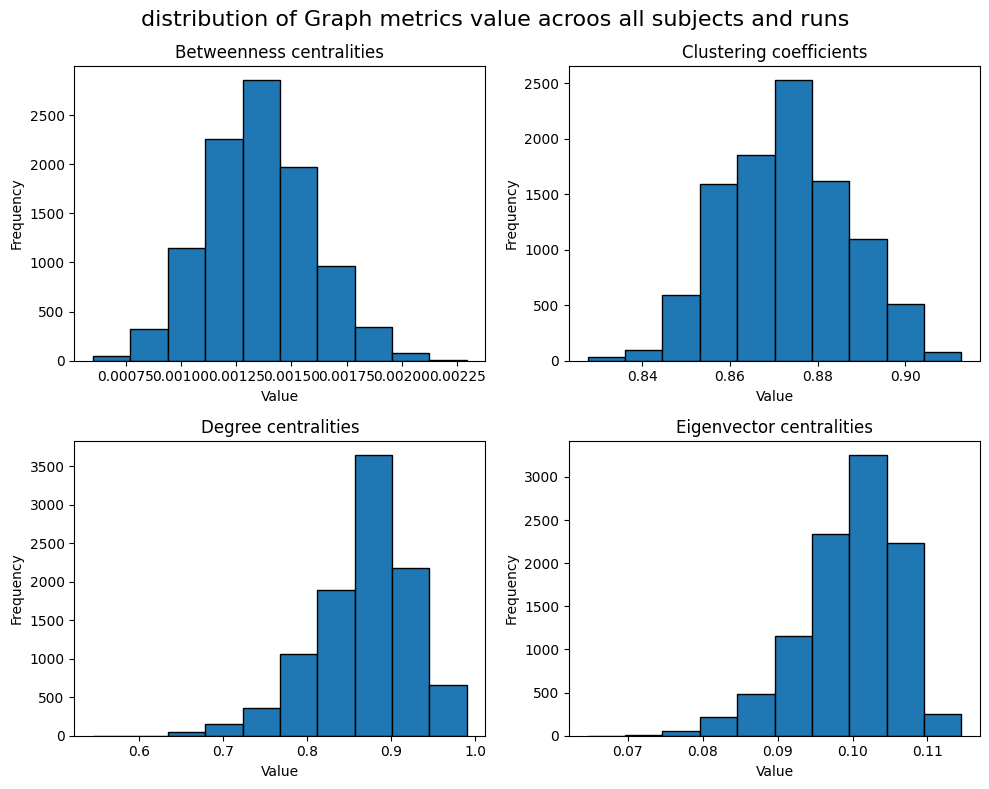

In [14]:
# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the 2D array of axes for easier iteration
axs = axs.flatten()

# Plot each metric
for idx, (metric, values) in enumerate(cumulative_metric_values_MCA.items()):
    axs[idx].hist(values, bins=10, edgecolor='black')
    axs[idx].set_title(metric.replace('_', ' ').capitalize())
    axs[idx].set_xlabel('Value')
    axs[idx].set_ylabel('Frequency')

fig.suptitle('distribution of Graph metrics value acroos all subjects and runs', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

In [16]:
# Initialize empty cumulative metric values
cumulative_metric_values_IEEE = {
    'betweenness_centralities': [],
    'clustering_coefficients': [],
    'degree_centralities': [],
    'eigenvector_centralities': []
}
for sub, metric in dict_4statistic_IEEE.items(): 
    for iter in range (1,11):
                        # Accumulate values for each metric
            cumulative_metric_values_IEEE['betweenness_centralities'].extend(
                list(metric['graph_metrics']['betweenness_centralities'].values())
            )
            cumulative_metric_values_IEEE['clustering_coefficients'].extend(
                list(metric['graph_metrics']['clustering_coefficients'].values())
            )
            cumulative_metric_values_IEEE['degree_centralities'].extend(
                list(metric['graph_metrics']['degree_centralities'].values())
            )
            cumulative_metric_values_IEEE['eigenvector_centralities'].extend(
                list(metric['graph_metrics']['eigenvector_centralities'].values())
            )



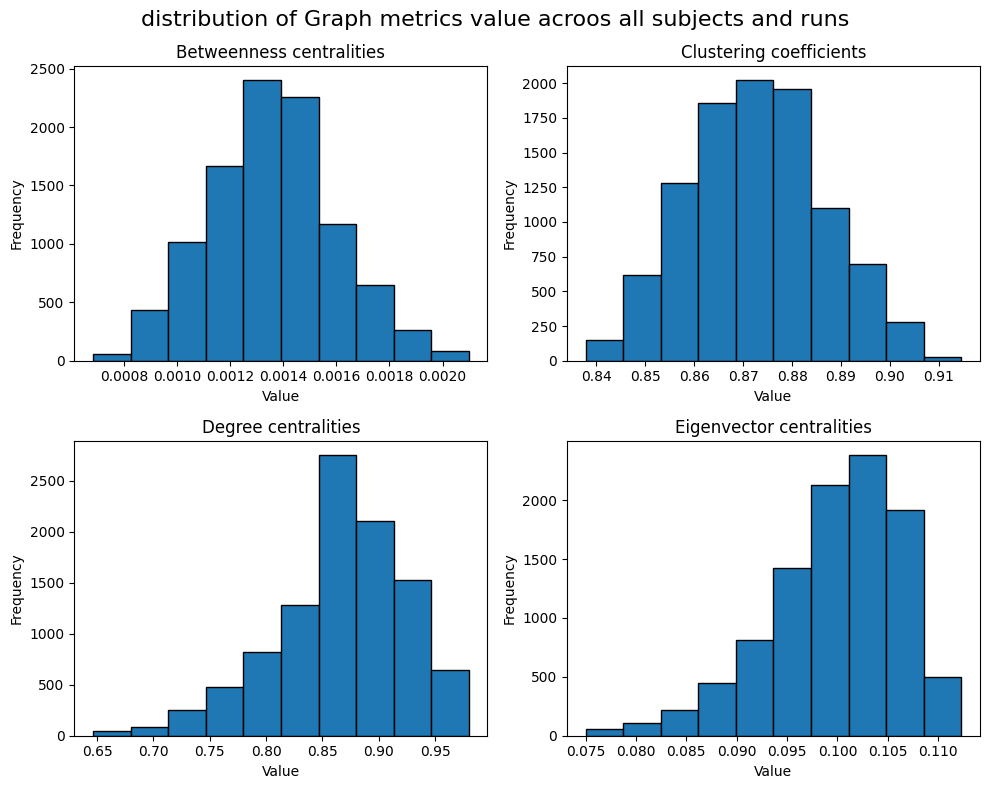

In [17]:
# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the 2D array of axes for easier iteration
axs = axs.flatten()

# Plot each metric
for idx, (metric, values) in enumerate(cumulative_metric_values_IEEE.items()):
    axs[idx].hist(values, bins=10, edgecolor='black')
    axs[idx].set_title(metric.replace('_', ' ').capitalize())
    axs[idx].set_xlabel('Value')
    axs[idx].set_ylabel('Frequency')

fig.suptitle('distribution of Graph metrics value acroos all subjects and runs', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_1(dict_4statistic_IEEE, iter=None):
    # Assuming you have initialized your arrays
    n = 10  # Number of subjects
    degree_centrality_values = np.zeros((n, 100))
    betweenness_centralities_values = np.zeros((n, 100))
    clustering_coefficients_values = np.zeros((n, 100))
    eigenvector_centralities_values = np.zeros((n, 100))

    # Iterate through each subject
    i = 0
    for subject, data in dict_4statistic_IEEE.items():
        if iter is None:
            # Convert dict_values to numpy array or list
            betweenness_centralities_values[i] = np.array(list(dict_4statistic_IEEE[subject]['graph_metrics']['betweenness_centralities'].values()))
            clustering_coefficients_values[i] = np.array(list(dict_4statistic_IEEE[subject]['graph_metrics']['clustering_coefficients'].values()))
            degree_centrality_values[i] = np.array(list(dict_4statistic_IEEE[subject]['graph_metrics']['degree_centralities'].values()))
            eigenvector_centralities_values[i] = np.array(list(dict_4statistic_IEEE[subject]['graph_metrics']['eigenvector_centralities'].values()))
        else:   
            # Convert dict_values to numpy array or list with the specified iteration
            iter_key = f'iter_{iter}'
            betweenness_centralities_values[i] = np.array(list(dict_4statistic_IEEE[subject][iter_key]['graph_metrics']['betweenness_centralities'].values()))
            clustering_coefficients_values[i] = np.array(list(dict_4statistic_IEEE[subject][iter_key]['graph_metrics']['clustering_coefficients'].values()))
            degree_centrality_values[i] = np.array(list(dict_4statistic_IEEE[subject][iter_key]['graph_metrics']['degree_centralities'].values()))
            eigenvector_centralities_values[i] = np.array(list(dict_4statistic_IEEE[subject][iter_key]['graph_metrics']['eigenvector_centralities'].values()))

        i += 1  # Move to the next subject
    
    # Calculate average values for each metric across subjects
    average_betweenness = np.mean(betweenness_centralities_values, axis=0)
    average_clustering = np.mean(clustering_coefficients_values, axis=0)
    average_degree = np.mean(degree_centrality_values, axis=0)
    average_eigenvector = np.mean(eigenvector_centralities_values, axis=0)

    # Plotting histograms
    plt.figure(figsize=(12, 8))

    # Histogram for Average Betweenness Centrality Values
    plt.subplot(221)
    plt.hist(average_betweenness, bins=20, edgecolor='black')
    plt.title('Histogram of Average Betweenness Centrality Values')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Histogram for Average Clustering Coefficients
    plt.subplot(222)
    plt.hist(average_clustering, bins=20, edgecolor='black')
    plt.title('Histogram of Average Clustering Coefficients across subjects')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Histogram for Average Degree Centralities
    plt.subplot(223)
    plt.hist(average_degree, bins=20, edgecolor='black')
    plt.title('Histogram of Average Degree Centralities across subjects')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Histogram for Average Eigenvector Centralities
    plt.subplot(224)
    plt.hist(average_eigenvector, bins=20, edgecolor='black')
    plt.title('Histogram of Average Eigenvector Centralities across subjects')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


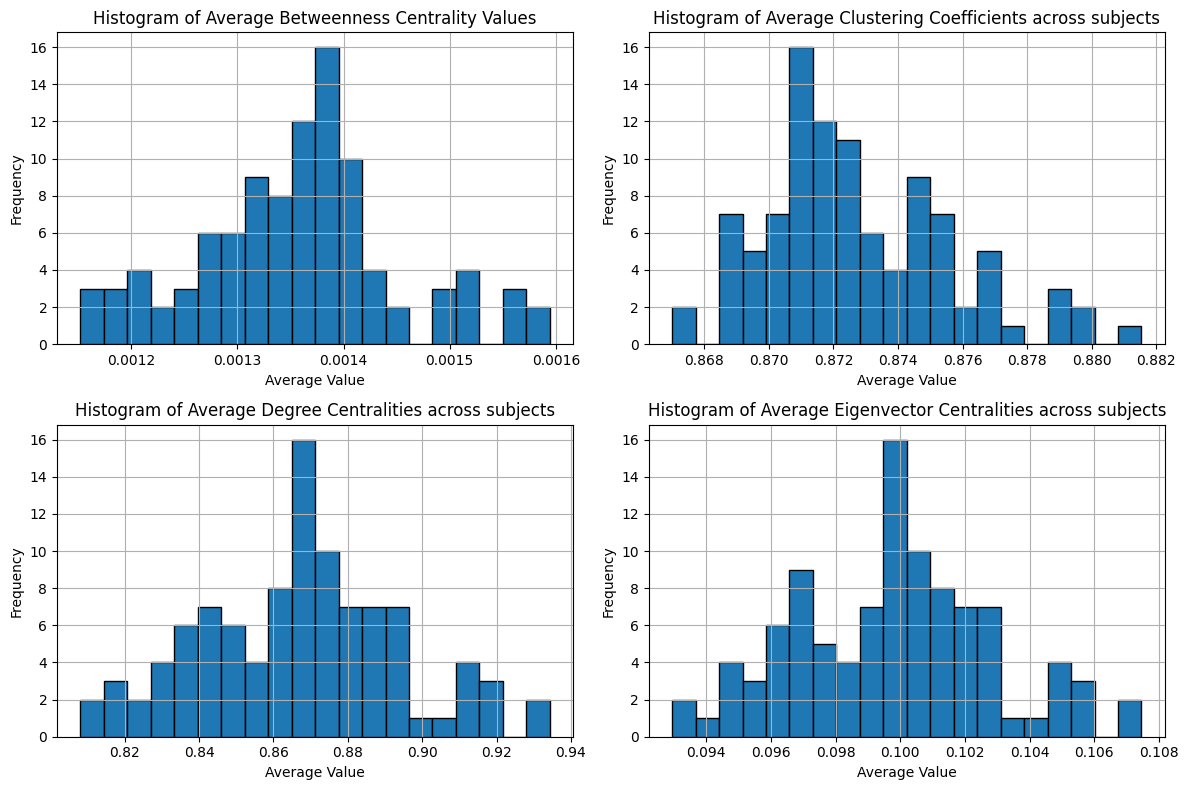

In [45]:
plot_1(dict_4statistic_IEEE, None)

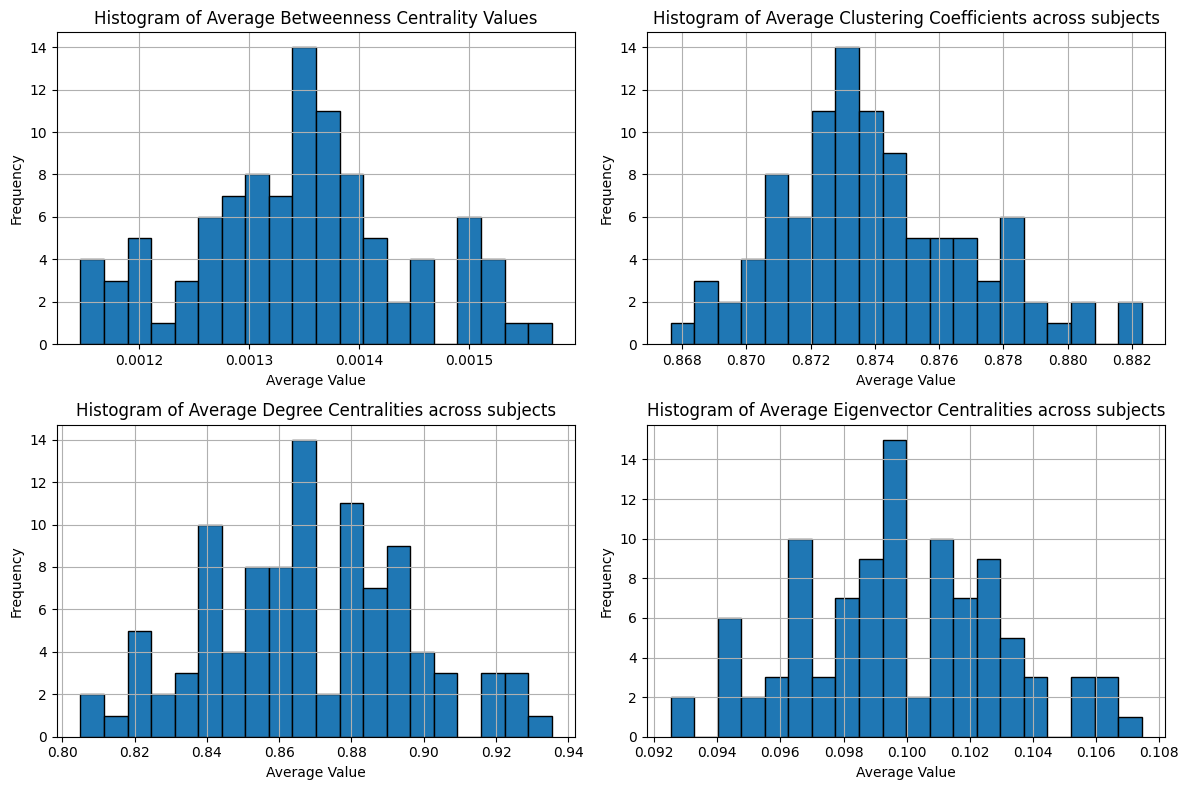

In [46]:
plot_1(dict_4statistic_MCA, 3)

In [41]:
dict_4statistic_MCA['sub-126BPCP021007']['iter_10'].items()

dict_items([('time_series', [[-1.7991998195648193, 0.9816442131996155, 1.0023934841156006, -0.16098032891750336, -1.1682785749435425, -1.1941584348678589, -1.2604877948760986, -0.9771268963813782, -1.1684045791625977, -0.48906126618385315, 0.2247471660375595, 0.3158419132232666, 0.5846688151359558, -0.2206108421087265, -0.06776732206344604, 0.25522151589393616, -0.41119110584259033, -0.9235432744026184, -2.1021406650543213, -0.19745215773582458, -0.5373116731643677, -0.7850593328475952, -0.12719157338142395, 0.5109307169914246, -0.6513342261314392, 0.008007284253835678, -0.4432752728462219, -0.5966855883598328, -1.0362927913665771, -1.3061870336532593, 0.06723523885011673, -0.33326995372772217, -0.09922312200069427, -0.7805156111717224, -1.5901352167129517, -1.0147039890289307, -1.0341588258743286, -0.17028813064098358, -1.9850339889526367, -0.7770814895629883, 0.30500027537345886, 0.3735816478729248, -1.3483232259750366, 0.8571102619171143, -0.6492753028869629, 0.03176634758710861, -1